$\Phi_{L} = \frac{1}{2}v_{0}^{2}ln(R_{c}^{2} + R^{2} + \frac{z^{2}}{q_{\Phi}^{2}})$

$\ddot{\vec{\textbf{x}}} = -\vec{\nabla}\Phi$

$\ddot{x}\vec{e_{x}} = -v_{0}^{2}\frac{1}{R_{c}^{2}+R^{2}+\frac{z^{2}}{q_{\Phi}^{2}}}x$

$\ddot{y}\vec{e_{y}} = -v_{0}^{2}\frac{1}{R_{c}^{2}+R^{2}+\frac{z^{2}}{q_{\Phi}^{2}}}y$

$\ddot{z}\vec{e_{z}} = -v_{0}^{2}\frac{1}{R_{c}^{2}+R^{2}+\frac{z^{2}}{q_{\Phi}^{2}}}\frac{z}{q_{\Phi}^{2}}$

$R^{2} = x^{2}+y^{2}$

$\mathcal{L}(\textbf{x},\dot{\textbf{x}},t) \equiv K - V = \frac{1}{2}m\dot{\textbf{x}}^{2} - V(\textbf{x},t)$

$\textbf{p} \equiv \left(\frac{\partial\mathcal{L}}{\partial\dot{\textbf{q}}}\right)_{\textbf{q},t}$

$H(\textbf{q},\textbf{p},t) = \textbf{p}\cdot\dot{\textbf{q}} - \mathcal{L}(\textbf{q},\dot{\textbf{q}},t)$

$\dot{\textbf{q}} = \frac{\partial{H}}{\partial{\textbf{p}}};\qquad\dot{\textbf{p}} = -\frac{\partial{H}}{\partial{\textbf{q}}}$

approximate integral for testing

$H_{x} = \frac{1}{2}v_{x}^{2} + \frac{1}{2}v_{0}^{2}\frac{x^{2}}{R_{c}^{2}}$
$\qquad H_{y} = \frac{1}{2}v_{y}^{2} + \frac{1}{2}v_{0}^{2}\frac{y^{2}}{q^{2}R_{c}^{2}}$

$(p_{\Phi})_{y=0} = x\dot{y} = x\sqrt{2[E - \Phi_{L}(x,0)] - \dot{x}^{2}}$

$H_{x}^{'} \equiv \frac{1}{2}\dot{x}^{2} + \Phi(x,0)$

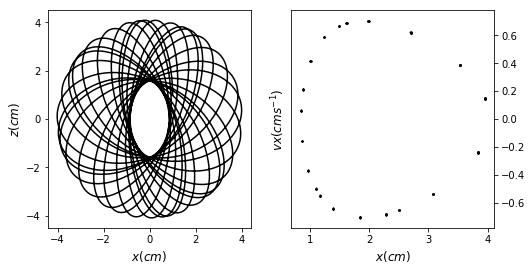

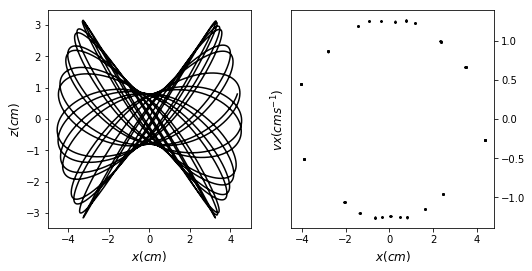

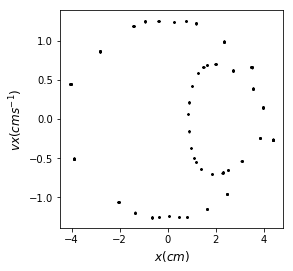

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def accx(x,y,z):
    a = -v0**2*x/(Rc**2 + (x**2+y**2) + z**2/q_phi**2)
    return a

def accy(x,y,z):
    a = -v0**2*y/(Rc**2 + (x**2+y**2) + z**2/q_phi**2)
    return a

def accz(x,y,z):
    a = -v0**2*z/(q_phi**2*Rc**2 + q_phi**2*(x**2+y**2) + z**2)
    return a

def R_K(x0,vx0,y0,vy0,z0,vz0,dt):
    k1,l1,m1 = vx0,vy0,vz0
    kk1,ll1,mm1 = accx(x0,y0,z0),accy(x0,y0,z0),accz(x0,y0,z0)
    k2,l2,m2 = (vx0+kk1*dt/2),(vy0+ll1*dt/2),(vz0+mm1*dt/2)
    kk2,ll2,mm2 = accx(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2),accy(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2),accz(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2)
    k3,l3,m3 = (vx0+kk2*dt/2),(vy0+ll2*dt/2),(vz0+mm2*dt/2)
    kk3,ll3,mm3 = accx(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2),accy(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2),accz(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2)
    k4,l4,m4 = (vx0+kk3*dt),(vy0+ll3*dt),(vz0+mm3*dt)
    kk4,ll4,mm4 = accx(x0+k3*dt,y0+l3*dt,z0+m3*dt),accy(x0+k3*dt,y0+l3*dt,z0+m3*dt),accz(x0+k3*dt,y0+l3*dt,z0+m3*dt)
    xn = x0 + (k1+2*k2+2*k3+k4)*dt/6
    vxn = vx0 + (kk1+2*kk2+2*kk3+kk4)*dt/6
    yn = y0 + (l1+2*l2+2*l3+l4)*dt/6
    vyn = vy0 + (ll1+2*ll2+2*ll3+ll4)*dt/6
    zn = z0 + (m1+2*m2+2*m3+m4)*dt/6
    vzn = vz0 + (mm1+2*mm2+2*mm3+mm4)*dt/6
    NN = [xn,vxn,yn,vyn,zn,vzn]
    return NN
def dyn(para,coor,num,dt):
    global v0, Rc, q_phi
    v0, Rc, q_phi = para
    x, vx, y, vy, z, vz = coor
    while(num>0):
        NN = R_K(x[-1],vx[-1],y[-1],vy[-1],z[-1],vz[-1],dt)
        x.append(NN[0])
        vx.append(NN[1])
        y.append(NN[2])
        vy.append(NN[3])
        z.append(NN[4])
        vz.append(NN[5])
        num = num-1
#    n = len(x)
#    t = np.arange(0,dt*n,dt)
    x, y, z, vx, vy, vz = np.array(x), np.array(y), np.array(z), np.array(vx), np.array(vy), np.array(vz)
    array = np.array([[x,y,z],[vx,vy,vz]])
    return array

para0 = [1, 1, 0.9]
coor0 = [[1], [0], [0], [0], [1], [np.sqrt(2)]]
num = 400000
dt = 0.001
res1 = dyn(para0,coor0,num,dt)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=[8,4])
ax1.plot(res1[0,0],res1[0,2],'k-')
ax1.set_xlabel('$x (cm)$',fontsize=12)
ax1.set_ylabel('$z (cm)$',fontsize=12)
mask1 = res1[0,2] < 0.005
mask2 = res1[0,2] > -0.005
mask3 = res1[1,2] > 0
mask_lo = mask1*mask2*mask3
#ax2.scatter(res1[0,0],res1[1,0],s=1,c='b')
ax2.scatter(res1[0,0][mask_lo],res1[1,0][mask_lo],s=1,c='k')
ax2.set_xlabel('$x (cm)$',fontsize=12)
ax2.set_ylabel('$vx (cm s^{-1})$',fontsize=12)
ax2.yaxis.tick_right()
plt.show()


para0 = [1, 1, 0.9]
coor0 = [[1], [1], [0], [0], [1], [1]]
num = 400000
dt = 0.001
res2 = dyn(para0,coor0,num,dt)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=[8,4])
ax1.plot(res2[0,0],res2[0,2],'k-')
ax1.set_xlabel('$x (cm)$',fontsize=12)
ax1.set_ylabel('$z (cm)$',fontsize=12)
mask1 = res2[0,2] < 0.005
mask2 = res2[0,2] > -0.005
mask3 = res2[1,2] > 0
mask_bo = mask1*mask2*mask3
ax2.scatter(res2[0,0][mask_bo],res2[1,0][mask_bo],s=1,c='k')
ax2.set_xlabel('$x (cm)$',fontsize=12)
ax2.set_ylabel('$vx (cm s^{-1})$',fontsize=12)
ax2.yaxis.tick_right()
plt.show()

plt.figure(figsize=[4,4])
plt.scatter(res1[0,0][mask_lo],res1[1,0][mask_lo],s=1,c='k')
plt.scatter(res2[0,0][mask_bo],res2[1,0][mask_bo],s=1,c='k')
plt.xlabel('$x (cm)$',fontsize=12)
plt.ylabel('$vx (cm s^{-1})$',fontsize=12)
plt.show()

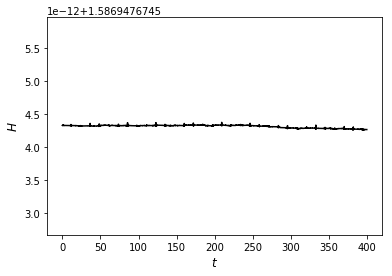

In [54]:
n = len(res2[0,0])
t = np.arange(0,dt*n,0.001)
Phi_L = 1/2*v0**2*np.log(Rc**2 + res2[0,0]**2 + res2[0,1]**2 + res2[0,2]**2/q_phi**2)
Kin = 1/2*(res2[1,0]**2 + res2[1,1]**2 + res2[1,2]**2)
HH = Kin + Phi_L
Lz = res2[0,0]*np.sqrt(2*(HH-Phi_L)-res2[1,0]**2)
#plt.ylim(1.584,1.59)
plt.plot(t,HH,'k-')
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$H $',fontsize=12)
plt.show()

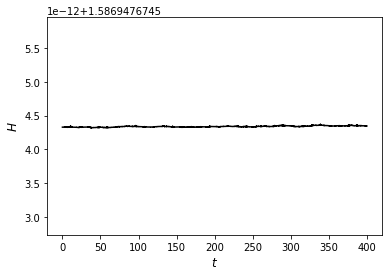

In [55]:
n = len(res1[0,0])
t = np.arange(0,dt*n,0.001)
Phi_L = 1/2*v0**2*np.log(Rc**2 + res1[0,0]**2 + res1[0,1]**2 + res1[0,2]**2/q_phi**2)
Kin = 1/2*(res1[1,0]**2 + res1[1,1]**2 + res1[1,2]**2)
HH = Kin + Phi_L
Lz = res1[0,0]*np.sqrt(2*(HH-Phi_L)-res1[1,0]**2)
#plt.ylim(1.584,1.59)
plt.plot(t,HH,'k-')
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$H $',fontsize=12)
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def accx(x,y,z):
    a = -v0**2*x/(Rc**2 + (x**2+y**2) + z**2/q_phi**2)
    return a

def accy(x,y,z):
    a = -v0**2*y/(Rc**2 + (x**2+y**2) + z**2/q_phi**2)
    return a

def accz(x,y,z):
    a = -v0**2*z/(q_phi**2*Rc**2 + q_phi**2*(x**2+y**2) + z**2)
    return a

def R_K(x0,vx0,y0,vy0,z0,vz0,dt):
    k1,l1,m1 = vx0,vy0,vz0
    kk1,ll1,mm1 = accx(x0,y0,z0),accy(x0,y0,z0),accz(x0,y0,z0)
    k2,l2,m2 = (vx0+kk1*dt/2),(vy0+ll1*dt/2),(vz0+mm1*dt/2)
    kk2,ll2,mm2 = accx(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2),accy(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2),accz(x0+k1*dt/2,y0+l1*dt/2,z0+m1*dt/2)
    k3,l3,m3 = (vx0+kk2*dt/2),(vy0+ll2*dt/2),(vz0+mm2*dt/2)
    kk3,ll3,mm3 = accx(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2),accy(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2),accz(x0+k2*dt/2,y0+l2*dt/2,z0+m2*dt/2)
    k4,l4,m4 = (vx0+kk3*dt),(vy0+ll3*dt),(vz0+mm3*dt)
    kk4,ll4,mm4 = accx(x0+k3*dt,y0+l3*dt,z0+m3*dt),accy(x0+k3*dt,y0+l3*dt,z0+m3*dt),accz(x0+k3*dt,y0+l3*dt,z0+m3*dt)
    xn = x0 + (k1+2*k2+2*k3+k4)*dt/6
    vxn = vx0 + (kk1+2*kk2+2*kk3+kk4)*dt/6
    yn = y0 + (l1+2*l2+2*l3+l4)*dt/6
    vyn = vy0 + (ll1+2*ll2+2*ll3+ll4)*dt/6
    zn = z0 + (m1+2*m2+2*m3+m4)*dt/6
    vzn = vz0 + (mm1+2*mm2+2*mm3+mm4)*dt/6
    NN = [xn,vxn,yn,vyn,zn,vzn]
    return NN
def dyn(para,coor,num,dt):
    global v0, Rc, q_phi
    v0, Rc, q_phi = para
    x, vx, y, vy, z, vz = coor
    while(num>0):
        NN = R_K(x[-1],vx[-1],y[-1],vy[-1],z[-1],vz[-1],dt)
        x.append(NN[0])
        vx.append(NN[1])
        y.append(NN[2])
        vy.append(NN[3])
        z.append(NN[4])
        vz.append(NN[5])
        num = num-1
#    n = len(x)
#    t = np.arange(0,dt*n,dt)
    x, y, z, vx, vy, vz = np.array(x), np.array(y), np.array(z), np.array(vx), np.array(vy), np.array(vz)
    array = np.array([[x,y,z],[vx,vy,vz]])
    return array

#def Phi(res):
#    Phi_L_x0 = 1/2*v0**2*np.log(Rc**2 + res[0,0]**2 + res[0,1]**2 + res[0,2]**2/q_phi**2) + 1/2*res[1,0]**2
#    return Phi_L_x0

In [53]:
def Phi_x_0(x):
    Phi_x0 = 1/2*v0**2*np.log(Rc**2 + x**2)
    return Phi_x0

def Hxx(x, vx):
    Hx = vx**2/2 + (v0*x/Rc)**2/2
    return Hx

def Hxddd(x, vx):
    Hxdd = vx**2/2 + Phi_x_0(x)
    return Hxdd

def p_phi_x_00(E, x, vx):
    p_phi = x*np.sqrt(2*(E - Phi_x_0(x)) - vx**2)
    return p_phi

def ro(E, x, vx):
    roo = 2*(E - Phi_x_0(x)) - vx**2
    return roo

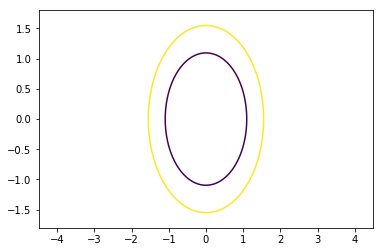

In [14]:
x = np.arange(-5,5,0.01)
vx = np.arange(-1.8,1.8,0.01)
X, VX = np.meshgrid(x, vx)
Hx = Hxx(X,VX)
mask = Hx>1.6
#mask2 = Hx>1.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
Hx = np.ma.masked_array(Hx, mask)
#print(Hx)
plt.xlim(-4.5,4.5)
plt.ylim(-1.8,1.8)
plt.contour(X,VX,Hx,2)
plt.show()

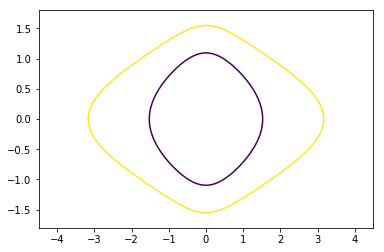

In [15]:
x = np.arange(-5,5,0.01)
vx = np.arange(-1.8,1.8,0.01)
X, VX = np.meshgrid(x, vx)
Hx = Hxddd(X,VX)
mask = Hx>1.6
#mask2 = Hx>1.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
Hx = np.ma.masked_array(Hx, mask)
#print(Hx)
plt.xlim(-4.5,4.5)
plt.ylim(-1.8,1.8)
plt.contour(X,VX,Hx,2)
plt.show()

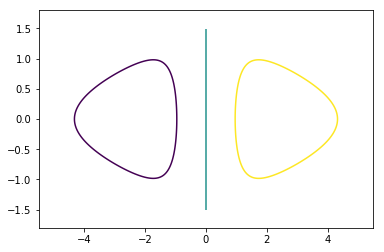

In [16]:
x = np.arange(-5,5,0.01)
vx = np.arange(-1.5,1.5,0.01)
X, VX = np.meshgrid(x, vx)
roo = ro(1.55, X, VX)
mas = roo<0
X = np.ma.masked_array(X, mas)
VX = np.ma.masked_array(VX, mas)
Hx = p_phi_x_00(1.55, X, VX)
mask = Hx>1.55
#mask2 = Hx<0.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
Hx = np.ma.masked_array(Hx, mask)
#print(Hx)
plt.xlim(-5.5,5.5)
plt.ylim(-1.8,1.8)
plt.contour(X,VX,Hx,2)
plt.show()

In [1]:
def Phi_x_0(x):
    Phi_x0 = 1/2*v0**2*np.log(Rc**2 + x**2)
    return Phi_x0

def Hx(H_x, x):
    vx = np.sqrt(2*H_x - (v0*x/Rc)**2)
    return vx

def Hxdd(H_xdd, x):
    vx = np.sqrt(2*H_xdd - 2*Phi_x_0(x))
    return vx

def p_phi_x_0(p_phi, E, x):
    vx = np.sqrt(2*(E - Phi_x_0(x)) - (p_phi/x)**2)
    return vx

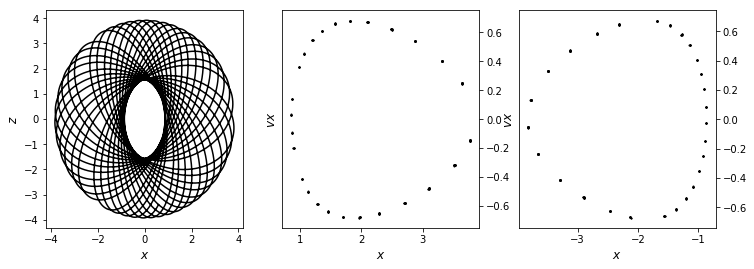

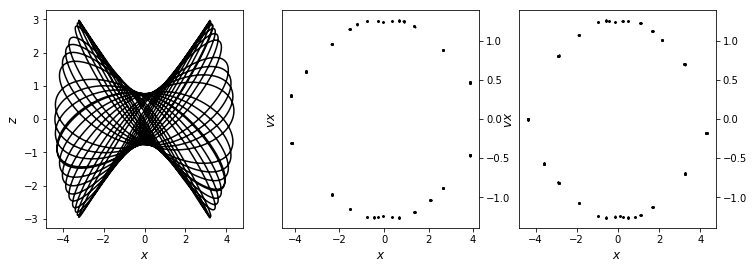

In [54]:
para0 = [1, 1, 0.9]
coor0 = [[1], [0], [0], [0], [0.9], [np.sqrt(2)]]
num = 500000
dt = 0.001
res1 = dyn(para0,coor0,num,dt)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[12,4])
ax1.plot(res1[0,0],res1[0,2],'k-')
ax1.set_xlabel('$x $',fontsize=12)
ax1.set_ylabel('$z $',fontsize=12)
mask1 = res1[0,2] < 0.005
mask2 = res1[0,2] > -0.005
mask3 = res1[1,2] > 0
mask_lo = mask1*mask2*mask3
ax2.scatter(res1[0,0][mask_lo],res1[1,0][mask_lo],s=1,c='k')
ax2.set_xlabel('$x $',fontsize=12)
ax2.set_ylabel('$vx $',fontsize=12)
ax2.yaxis.tick_right()
mask3 = res1[1,2] < 0
mask_loo = mask1*mask2*mask3
ax3.scatter(res1[0,0][mask_loo],res1[1,0][mask_loo],s=1,c='k')
ax3.set_xlabel('$x $',fontsize=12)
ax3.set_ylabel('$vx $',fontsize=12)
ax3.yaxis.tick_right()
plt.show()

#para0 = [1, 0.14, 0.9]
coor0 = [[1], [1], [0], [0], [0.9], [1]]
res2 = dyn(para0,coor0,num,dt)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[12,4])
ax1.plot(res2[0,0],res2[0,2],'k-')
ax1.set_xlabel('$x $',fontsize=12)
ax1.set_ylabel('$z $',fontsize=12)
mask1 = res2[0,2] < 0.005
mask2 = res2[0,2] > -0.005
mask3 = res2[1,2] > 0
mask_bo = mask1*mask2*mask3
ax2.scatter(res2[0,0][mask_bo],res2[1,0][mask_bo],s=1,c='k')
ax2.set_xlabel('$x $',fontsize=12)
ax2.set_ylabel('$vx $',fontsize=12)
ax2.yaxis.tick_right()
mask3 = res2[1,2] < 0
mask_boo = mask1*mask2*mask3
ax3.scatter(res2[0,0][mask_boo],res2[1,0][mask_boo],s=1,c='k')
ax3.set_xlabel('$x $',fontsize=12)
ax3.set_ylabel('$vx $',fontsize=12)
ax3.yaxis.tick_right()
plt.show()

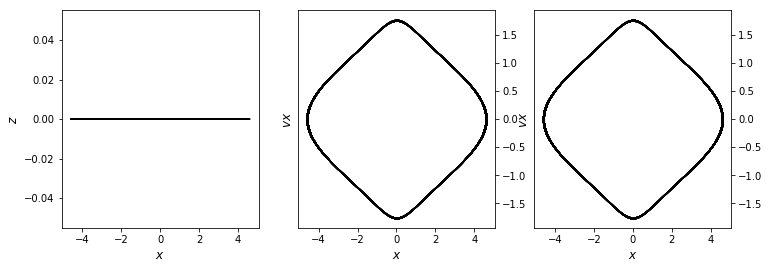

In [55]:
coor0 = [[np.sqrt(2)], [np.sqrt(2)], [0], [0], [0], [0]]
num = 50000
#dt = 0.001
res3 = dyn(para0,coor0,num,dt)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[12,4])
ax1.plot(res3[0,0],res3[0,2],'k-')
ax1.set_xlabel('$x $',fontsize=12)
ax1.set_ylabel('$z $',fontsize=12)
#mask1 = res3[0,2] < 0.005
#mask2 = res3[0,2] > -0.005
#mask3 = res3[1,2] > 0
#mask_bo = mask1*mask2*mask3
ax2.scatter(res3[0,0],res3[1,0],s=0.05,c='k')
ax2.set_xlabel('$x $',fontsize=12)
ax2.set_ylabel('$vx $',fontsize=12)
ax2.yaxis.tick_right()
#mask3 = res3[1,2] < 0
#mask_boo = mask1*mask2*mask3
ax3.scatter(res3[0,0],res3[1,0],s=0.05,c='k')
ax3.set_xlabel('$x $',fontsize=12)
ax3.set_ylabel('$vx $',fontsize=12)
ax3.yaxis.tick_right()

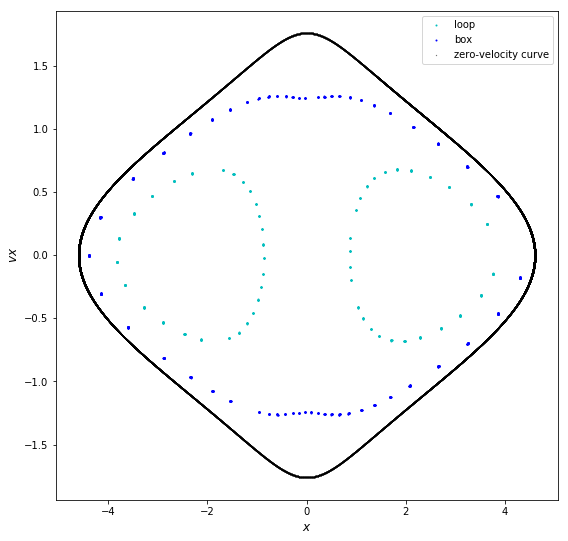

In [65]:
plt.figure(figsize=[9,9])
plt.scatter(res1[0,0][mask_lo],res1[1,0][mask_lo],s=1,c='c')
plt.scatter(res2[0,0][mask_bo],res2[1,0][mask_bo],s=1,c='b')
plt.scatter(res1[0,0][mask_loo],res1[1,0][mask_loo],s=1,c='c',label='loop')
plt.scatter(res2[0,0][mask_boo],res2[1,0][mask_boo],s=1,c='b',label='box')
plt.scatter(res3[0,0],res3[1,0],s=0.05,c='k',label='zero-velocity curve')
plt.xlabel('$x $',fontsize=12)
plt.ylabel('$vx $',fontsize=12)
plt.legend()
plt.show()

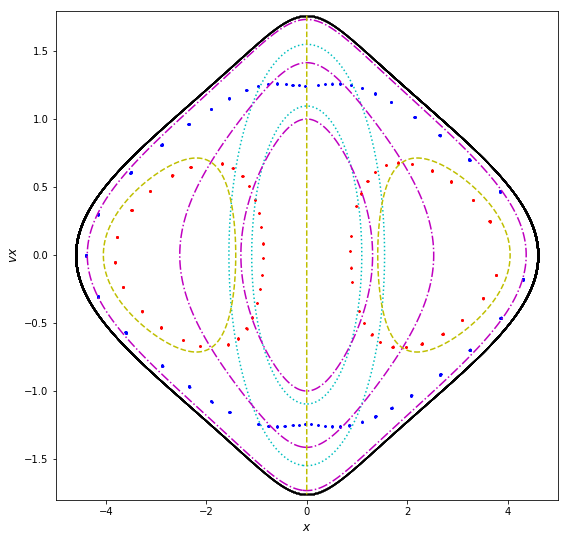

In [66]:
plt.figure(figsize=[9,9])
plt.scatter(res1[0,0][mask_lo],res1[1,0][mask_lo],s=1,c='r')
plt.scatter(res2[0,0][mask_bo],res2[1,0][mask_bo],s=1,c='b')
plt.scatter(res1[0,0][mask_loo],res1[1,0][mask_loo],s=1,c='r')
plt.scatter(res2[0,0][mask_boo],res2[1,0][mask_boo],s=1,c='b')
plt.scatter(res3[0,0],res3[1,0],s=0.05,c='k')
x = np.arange(-5,5,0.0025)
vx = np.arange(-1.8,1.8,0.0025)
X, VX = np.meshgrid(x, vx)

Hx = Hxx(X,VX)
mask = Hx>1.6
#mask2 = Hx<1.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
Hx = np.ma.masked_array(Hx, mask)
plt.contour(X,VX,Hx,2,colors='c',linestyles='dotted')

X, VX = np.meshgrid(x, vx)
Hx = Hxddd(X,VX)
mask = Hx>2
#mask2 = Hx>1.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
Hx = np.ma.masked_array(Hx, mask)
plt.contour(X,VX,Hx,3,colors='m',linestyles='dashdot')

X, VX = np.meshgrid(x, vx)
roo = ro(1.55, X, VX)
mas = roo<0
X = np.ma.masked_array(X, mas)
VX = np.ma.masked_array(VX, mas)
pp = p_phi_x_00(1.55, X, VX)
mask = Hx>1.55
#mask2 = Hx<0.5
#mask = mask1*mask2
X = np.ma.masked_array(X, mask)
VX = np.ma.masked_array(VX, mask)
pp = np.ma.masked_array(pp, mask)
plt.contour(X,VX,pp,2,colors='y',linestyles='dashed')

plt.xlabel('$x $',fontsize=12)
plt.ylabel('$vx $',fontsize=12)
plt.show()

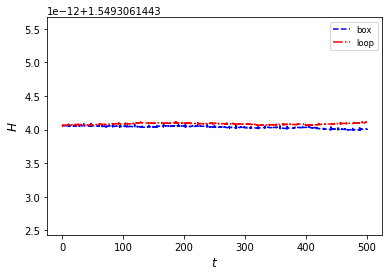

In [72]:
n = len(res2[0,0])
t = np.arange(0,dt*n,0.001)
Phi_L2 = 1/2*v0**2*np.log(Rc**2 + res2[0,0]**2 + res2[0,1]**2 + res2[0,2]**2/q_phi**2)
Kin2 = 1/2*(res2[1,0]**2 + res2[1,1]**2 + res2[1,2]**2)
HH2 = Kin2 + Phi_L2
#Lz = res2[0,0]*np.sqrt(2*(HH-Phi_L)-res2[1,0]**2)
#plt.ylim(0.51,0.52)
plt.plot(t,HH2,'b--',label='box')
n = len(res1[0,0])
t = np.arange(0,dt*n,0.001)
Phi_L1 = 1/2*v0**2*np.log(Rc**2 + res1[0,0]**2 + res1[0,1]**2 + res1[0,2]**2/q_phi**2)
Kin1 = 1/2*(res1[1,0]**2 + res1[1,1]**2 + res1[1,2]**2)
HH1 = Kin1 + Phi_L1
plt.plot(t,HH1,'r-.',label='loop')
n = len(res3[0,0])
t = np.arange(0,dt*n,0.001)
Phi_L3 = 1/2*v0**2*np.log(Rc**2 + res3[0,0]**2 + res3[0,1]**2 + res3[0,2]**2/q_phi**2)
Kin3 = 1/2*(res3[1,0]**2 + res3[1,1]**2 + res3[1,2]**2)
HH3 = Kin3 + Phi_L3
#plt.plot(t,HH3,'g.')
#Lz = res2[0,0]*np.sqrt(2*(HH-Phi_L)-res2[1,0]**2)
#plt.ylim(1.549,1.5496)
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$H $',fontsize=12)
plt.legend(fontsize='small')
plt.show()

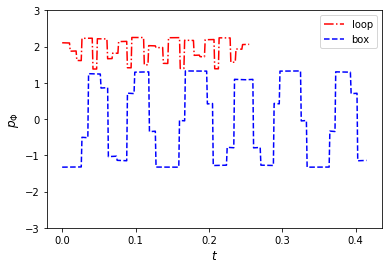

In [70]:
pz1 = res1[0,0]*res1[1,2]
n = len(pz1[mask_lo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,pz1[mask_lo],'r-.',label='loop')
pz2 = res2[0,0]*res2[1,2]
n = len(pz2[mask_bo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,pz2[mask_bo],'b--',label='box')
n = len(res3[0,0])
t = np.arange(0,dt*n,0.001)
pz3 = res3[0,0]*res3[1,2]
#plt.plot(t,pz3,'g.')
#Lz = res2[0,0]*np.sqrt(2*(HH-Phi_L)-res2[1,0]**2)
plt.ylim(-3,3)
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$p_{\Phi} $',fontsize=12)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


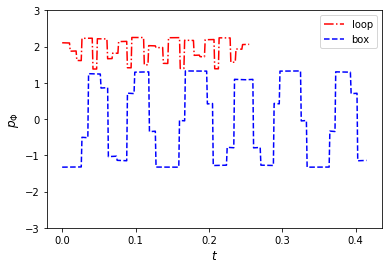

In [69]:
pz11 = res1[0,0]*np.sqrt(2*(HH1-Phi_L1)-res1[1,0]**2)
n = len(pz11[mask_lo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,pz11[mask_lo],'r-.',label='loop')
pz22 = res2[0,0]*np.sqrt(2*(HH2-Phi_L2)-res2[1,0]**2)
n = len(pz22[mask_bo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,pz22[mask_bo],'b--',label='box')
n = len(res3[0,0])
t = np.arange(0,dt*n,0.001)
pz33 = res3[0,0]*np.sqrt(2*(HH3-Phi_L3)-res3[1,0]**2)
#plt.plot(t,pz33,'g.')
#Lz = res2[0,0]*np.sqrt(2*(HH-Phi_L)-res2[1,0]**2)
plt.ylim(-3,3)
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$p_{\Phi} $',fontsize=12)
plt.legend()
plt.show()

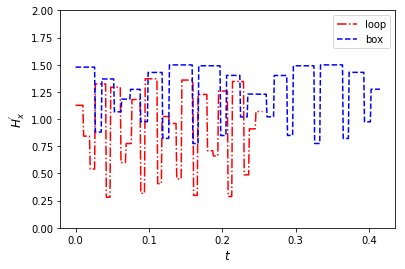

In [71]:
Hxdd1 = res1[1,0]**2/2 + Phi_L1
n = len(Hxdd1[mask_lo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,Hxdd1[mask_lo],'r-.',label='loop')
Hxdd2 = res2[1,0]**2/2 + Phi_L2
n = len(Hxdd2[mask_bo])
t = np.arange(0,dt*n,0.001)
plt.plot(t,Hxdd2[mask_bo],'b--',label='box')
n = len(res3[0,0])
t = np.arange(0,dt*n,0.001)
Hxdd3 = res3[1,0]**2/2 + Phi_L3
plt.ylim(0,2)
plt.xlabel('$t $',fontsize=12)
plt.ylabel('$H_{x}^{\'} $',fontsize=12)
plt.legend()
plt.show()